# Final Project Big Ideas

### What is the best Neightborhood in Pittsburgh to be homeless in?

In [48]:
import pandas as pd
import geopandas as geo
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
data = {
    'id': [2, 4, 5, 6, 3, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
    'neighborhood': ['31st ward', 'Allegheny Center', 'Allegheny West', 'Allentown', 'Arlington',
                      'Banksville-Greentree', 'Beechview', 'Beltzhoover', 'Bloomfield', 'Bon Air',
                      'Brighton Heights', 'Brookline', 'Carrick', 'Central North Side', 'Chartiers City',
                      'City View', 'Crafton Heights', 'Downtown', 'Duquesne Heights', 'East Hills'],
    'number_major_crimes_1973': [125, 277, 154, 117, 243, 145, 221, 293, 486, 36, 157, 354, 275, 541, 18, 24, 71, 1458, 48, 66],
    'neighborhood_crime_rate_1973': [0.017, 0.151, 0.147, 0.026, 0.037, 0.023, 0.018, 0.054, 0.038, 0.026, 0.015, 0.018, 0.018, 0.098, 0.015, 0.032, 0.013, 0.469, 0.018, 0.036],
    'number_major_crimes_1974': [85, 407, 197, 80, 177, 151, 220, 263, 492, 40, 161, 397, 266, 591, 20, 20, 66, 1942, 61, 109],
    'neighborhood_crime_rate_1974': [0.012, 0.222, 0.188, 0.018, 0.027, 0.024, 0.018, 0.049, 0.039, 0.029, 0.016, 0.02, 0.017, 0.107, 0.017, 0.027, 0.012, 0.625, 0.023, 0.06],
    'number_major_crimes_1975': [92, 571, 227, 114, 184, 133, 244, 241, 656, 28, 155, 319, 287, 585, 20, 15, 69, 2683, 86, 131],
    'neighborhood_crime_rate_1975': [0.013, 0.312, 0.217, 0.025, 0.028, 0.021, 0.02, 0.045, 0.052, 0.02, 0.015, 0.016, 0.019, 0.106, 0.017, 0.02, 0.012, 0.864, 0.032, 0.072]
}

# DataFrame
df = pd.DataFrame(data)

# Calculate the average crime rate for each neighborhood
df['average_crime_rate'] = df[['neighborhood_crime_rate_1973', 'neighborhood_crime_rate_1974', 'neighborhood_crime_rate_1975']].mean(axis=1)

# Rank neighborhoods based on average crime rate
ranked_df = df.sort_values(by='average_crime_rate')

# Display the result
print(ranked_df[['neighborhood', 'average_crime_rate']])

            neighborhood  average_crime_rate
16       Crafton Heights            0.012333
0              31st ward            0.014000
10      Brighton Heights            0.015333
14        Chartiers City            0.016333
11             Brookline            0.018000
12               Carrick            0.018000
6              Beechview            0.018667
5   Banksville-Greentree            0.022667
3              Allentown            0.023000
18      Duquesne Heights            0.024333
9                Bon Air            0.025000
15             City View            0.026333
4              Arlington            0.030667
8             Bloomfield            0.043000
7            Beltzhoover            0.049333
19            East Hills            0.056000
13    Central North Side            0.103667
2         Allegheny West            0.184000
1       Allegheny Center            0.228333
17              Downtown            0.652667


In [46]:
url = "https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/13982f58-e618-400c-8f69-6a32dbd7c68f/download/value.csv"
df = pd.read_csv(url)
newDf = df[df['Estimate; Total: - Less than $10,000'] > 0]
decendingDf = newDf.sort_values(by='Estimate; Total: - Less than $10,000' , ascending= False)

decendingDf[['Neighborhood', 'Estimate; Total:', 'Estimate; Total: - Less than $10,000', 'Margin of Error; Total: - Less than $10,000']].head(25)

,Neighborhood,Estimate; Total:,"Estimate; Total: - Less than $10,000","Margin of Error; Total: - Less than $10,000"
34,Garfield,628.0,54.0,28.407745
13,Brookline,4245.0,47.0,50.259327
2,Allentown,538.0,45.0,33.734256
77,Squirrel Hill South,3152.0,36.0,47.791213
51,Morningside,954.0,34.0,30.692019
73,South Side Slopes,1053.0,31.0,33.896903
89,Westwood,973.0,29.0,25.495098
53,Mount Washington,1828.0,27.0,31.128765
41,Homewood South,396.0,27.0,26.776856
5,Banksville,985.0,26.0,35.510562


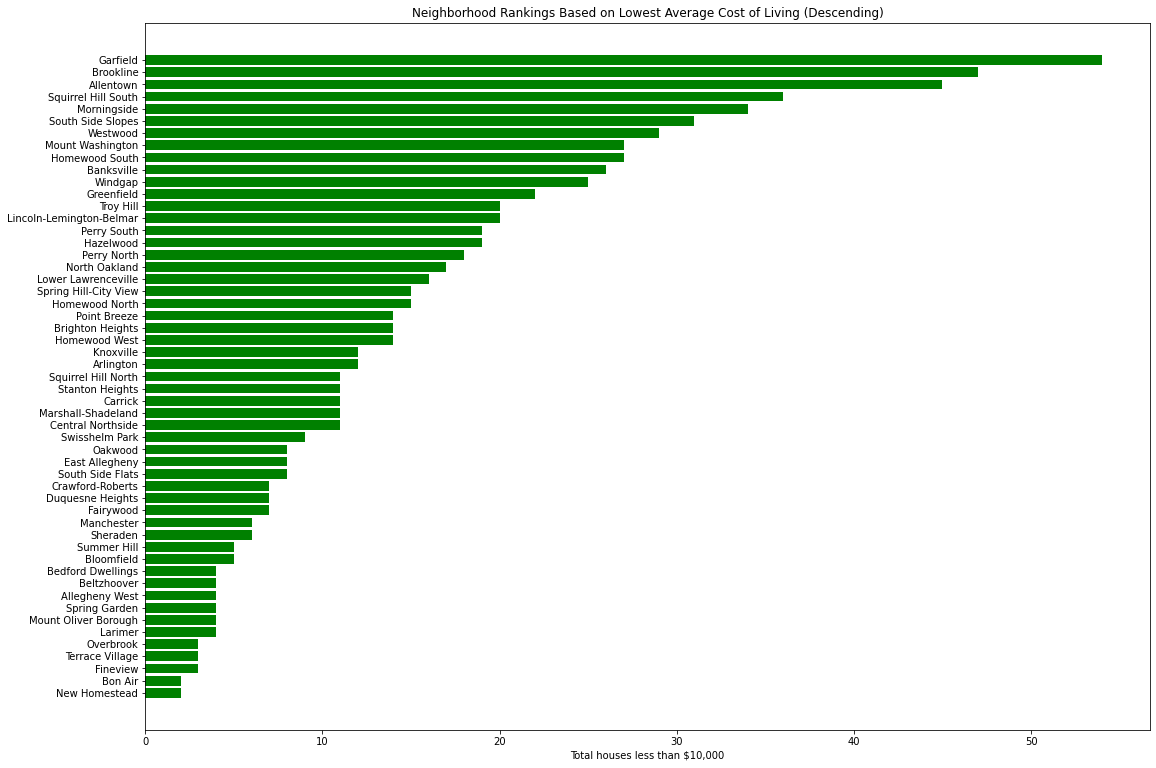

In [61]:
plt.figure(figsize=(18, 13))
plt.barh(decendingDf['Neighborhood'], decendingDf['Estimate; Total: - Less than $10,000'], color='green')
plt.xlabel('Total houses less than $10,000')
plt.title('Neighborhood Rankings Based on Lowest Average Cost of Living (Descending)')
plt.gca().invert_yaxis()
plt.show()